# N Queens

# Importing libraries

In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Functions for checking Answer

In [2]:
def column(A, y):
    if np.sum(A.T[y]):
        return True
    return False

def row(A,x):
    if np.sum(A[x]):
        return True
    return False


def diag(A, x, y):
    n = A.shape[0]
    result = False
    i = x
    j = y
    while i < n and j < n:
        if A[i][j] == 1:
            result = True
            break
        i += 1
        j += 1
    if result:
        return True
    i = x - 1
    j = y - 1
    while i > -1 and j > -1 :
        if A[i][j] == 1:
            result = True
            break
        i -= 1
        j -= 1
    if result:
        return True
    i = x + 1
    j = y - 1
    while  i < n and j > -1 :
        if A[i][j] == 1:
            result = True
            break
        i += 1
        j -= 1
    if result:
        return True
    i = x - 1
    j = y + 1
    while  i > -1 and j < n :
        if A[i][j] == 1:
            result = True
            break
        i -= 1
        j += 1
    return result


def collision(A, x, y):
    return column(A, y) or row(A, x) or diag(A, x, y)

def IsAnswer(A):
    n = A.shape[0]
    if np.sum(A) != n:
        return False
    for i in range(n):
        for j in range(n):
            if A[i][j] == 1:
                A[i][j] = 0
                if collision(A, i, j):
                    A[i][j] = 1
                    return False
                A[i][j] = 1
    return True

In [3]:
A = np.array([[0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0]])
print(A)
print(IsAnswer(A))

[[0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]
True


# Backtracking

In [4]:
def backtracking_Queens(N):
    A = np.zeros((N,N))
    col = [False]*N
    diag1 = [False] * (2*N - 1)
    diag2 = [False] * (2*N - 1)
    stack = []
    backtracking_search(A, N, 0, col, diag1, diag2, stack)
    while len(stack) > 0:
        x, y = stack.pop()
        A[x][y] = 1
    return A

def backtracking_search(A, N, y, col, diag1, diag2, stack):
    if y == N:
        return stack
    for x in range(N):
        if col[x] or diag1[x+y] or diag2[x-y+N-1]:
            continue
        stack.append([x,y])
        col[x] = diag1[x + y] = diag2[x - y + N - 1] = True
        result = backtracking_search(A, N, y + 1, col, diag1, diag2, stack)
        if result != None:
            if len(result) == N:
                return result
        col[x] = diag1[x + y] = diag2[x - y + N - 1] = False
        stack.pop()

In [5]:
board = backtracking_Queens(8)
print(board)
print(IsAnswer(board))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]
True


# Number of permutations

In [6]:
def per_backtracking_Queens(N):
    cnt = 0
    col = [False]*N
    diag1 = [False] * (2*N - 1)
    diag2 = [False] * (2*N - 1)
    return per_backtracking_search(N, 0, col, diag1, diag2, cnt)

def per_backtracking_search(N, y, col, diag1, diag2, cnt):
    if y == N:
        cnt += 1
        return cnt
    for x in range(N):
        if col[x] or diag1[x+y] or diag2[x-y+N-1]:
            continue
        col[x] = diag1[x + y] = diag2[x - y + N - 1] = True
        cnt = per_backtracking_search(N, y + 1, col, diag1, diag2, cnt)
        col[x] = diag1[x + y] = diag2[x - y + N - 1] = False
    return cnt

In [7]:
print(per_backtracking_Queens(5))

10


# Iterating over N

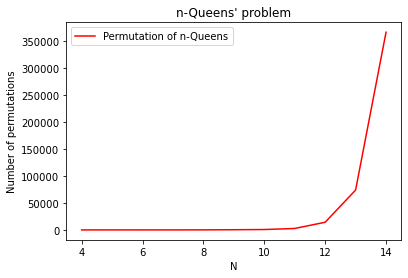

In [11]:
N = range(4,15)
cnt = []
for n in N:
    cnt.append(per_backtracking_Queens(n))

plt.plot(N, cnt, 'r', label='Permutation of n-Queens')

plt.xlabel('N')
plt.ylabel('Number of permutations')

plt.title("n-Queens' problem")

plt.legend()

plt.show()

# MRV backtracking

In [9]:
def board_update(H, n, x, y):
    H[x] = 1 # row
    # ----- column --------
    for i in range(n):
        H[i][y] = 1
    
    # ----- diagonal ------
    
    i = x
    j = y
    while i < n and j < n:
        H[i][j] = 1
        i += 1
        j += 1
        
    i = x - 1
    j = y - 1
    while i > -1 and j > -1 :
        H[i][j] = 1
        i -= 1
        j -= 1
        
    i = x + 1
    j = y - 1
    while  i < n and j > -1 :
        H[i][j] = 1
        i += 1
        j -= 1
        
    i = x - 1
    j = y + 1
    while  i > -1 and j < n :
        H[i][j] = 1
        i -= 1
        j += 1
    
    return H

def Heuristic(H, n, x, y):
#     print(H[x], H.T[y])
    h = 1
    
    # ----- diagonal ------
    i = x
    j = y
    while i < n and j < n:
        h += H[i][j]
        i += 1
        j += 1
        
    i = x - 1
    j = y - 1
    while i > -1 and j > -1 :
        h += H[i][j]
        i -= 1
        j -= 1
        
    i = x + 1
    j = y - 1
    while  i < n and j > -1 :
        h += H[i][j]
        i += 1
        j -= 1
        
    i = x - 1
    j = y + 1
    while  i > -1 and j < n :
        h += H[i][j]
        i -= 1
        j += 1
    
    return h
    

def mrv_backtracking(N):
    A = np.zeros((N,N))
    col = [False]*N
    diag1 = [False] * (2*N - 1)
    diag2 = [False] * (2*N - 1)
    stack = []
    H = np.zeros((N,N))
    mrv_backtracking_search(A, N, 0, col, diag1, diag2, stack, H)
    while len(stack) > 0:
        x, y = stack.pop()
        A[x][y] = 1
    return A

def mrv_backtracking_search(A, N, y, col, diag1, diag2, stack, H):
    if y == N:
        return stack
    order = A.T[y]
    for i in range(N):
        order[i] = Heuristic(H, N, i, y)
    order = np.argsort(order)
    for x in order:
        if col[x] or diag1[x+y] or diag2[x-y+N-1]:
            continue
        stack.append([x,y])
        H_temp = H
        H_temp = Heuristic(H_temp, N, x, y)
        col[x] = diag1[x + y] = diag2[x - y + N - 1] = True
        result = mrv_backtracking_search(A, N, y + 1, col, diag1, diag2, stack, H_temp)
        if result != None:
            if len(result) == N:
                return result
        col[x] = diag1[x + y] = diag2[x - y + N - 1] = False
        stack.pop()


In [10]:
board = mrv_backtracking(8)
# print(board)
# print(IsAnswer(board))